<a href="https://colab.research.google.com/github/cattleherd/fastai/blob/master/chapter%201/ethnicitydistinction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install duckduckgo_search


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [ ]:

from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('african american person photo', max_images=1)
urls[0]

Searching for 'african american person photo'


'https://www.sheknows.com/wp-content/uploads/2018/08/nelson-m-feature_sgpxz0.jpeg'

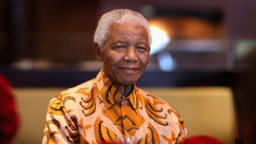

In [ ]:
from fastdownload import download_url
dest = 'african.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Searching for 'caucasian person photos'


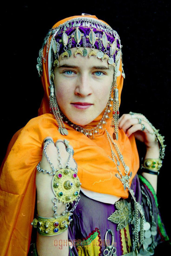

In [ ]:
download_url(search_images('caucasian person photos', max_images=1)[0], 'caucasian.jpg', show_progress=False)
Image.open('caucasian.jpg').to_thumb(256,256)

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

In [ ]:
search = ['Ethiopian person', 'african person']
path = Path('african_or_not/african people')
from time import sleep

for e in search:
  dest = (path)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{e} photo'))
  sleep(10)  # Pause between searches to avoid over-loading server
  download_images(dest, urls=search_images(f'{e} smiling photo'))
  sleep(10)
  resize_images(path, max_size=400, dest=path)

Searching for 'Ethiopian person photo'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'Ethiopian person smiling photo'
Searching for 'african person photo'
Searching for 'african person smiling photo'


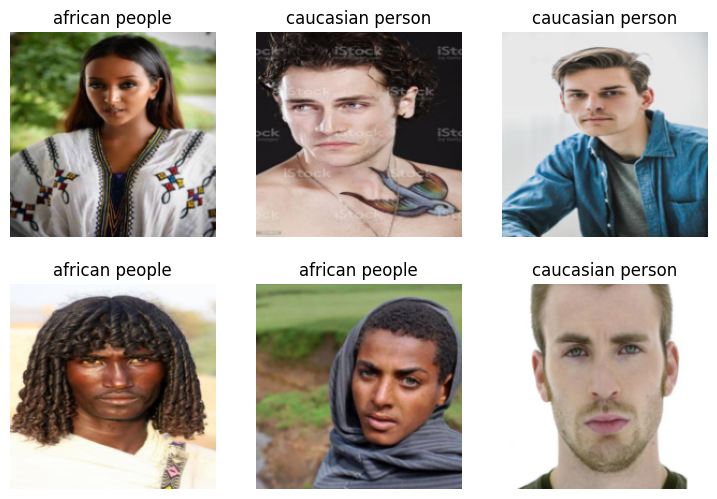

In [ ]:

path2 = Path('african_or_not')
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path2, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.952517,0.312048,0.102564,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.417840,0.352758,0.153846,00:31
1,0.354768,0.308861,0.128205,00:31
2,0.304952,0.252302,0.102564,00:31


In [ ]:
dest = 'chunkz.jpg'
download_url("https://i.guim.co.uk/img/media/c78c966ec1ea4afc5dd0b48e314cf8d6b677ebde/296_36_2563_1538/master/2563.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=6a190ed5237cb234ceeb091e2c4b4242", dest, show_progress=False)

Path('chunkz.jpg')

In [ ]:
is_african,_,probs = learn.predict(PILImage.create('chunkz.jpg'))
print(f"This is an: {is_african}.")
print(f"Probability it's an african person: {probs[0]:.4f}")

This is an: caucasian person.
Probability it's an african person: 0.1502


After running the code it seems that its not sufficient in determining between ethnicities. It is easier to determine between two distinct objects than ethnicities since there is more nuance to it
